# Основной вопрос

Dataset "Airlines Customer satisfaction"  -- содержит данные перелетов и клиентов, оценки различных фичей при перелёте и уровень удовлетворенности, характеристики клиентов и характеристики перелётов.

Необходимо предсказать, будет ли  лояльный клиент, который летит по личным мотивам, бизнес - классом удовлетворен своим обслуживанием, учитывая детали значений других параметров. 

# Оглавление

- Загрузка данных и библиотек

- Обработка данных

- Построение моделей 

- Исследование модели - влияние конкретных переменных на предсказание

- Интерпретация на конкретные примеры и влияние переменных на результат предсказания

# Данные и библиотеки

In [3]:
# загружаем библиотеки и данные
import numpy as np
import pandas as pd
dataAT = pd.read_csv("/work/Invistico_Airline2.csv")

In [45]:
# загружаем библиотеки

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.model_selection import cross_val_score


from scipy import stats

In [6]:
!pip install statsmodels
import statsmodels.api as sm 

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [8]:
!pip install pydotplus==2.0.2
from six import StringIO  
from IPython.display import Image  
import pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 47.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=af3830e5fa7b44a0b6ebd86611686da29fdde4915182aacf1dd332595b550a8e
  Stored in directory: /root/.cache/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [9]:
!pip install shap
import shap
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 125.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 62.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [10]:
!pip install pycebox
from pycebox.ice import ice, ice_plot

  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3640 sha256=47a6208f98c7f7c7f06dc7f7d71f6be86c71f3f990e9d2d76ef60ba5079b53ee
  Stored in directory: /root/.cache/pip/wheels/cf/59/51/a5fb9b5d2384586d5d2184028d412f6f6b7d5ff79c2b4c7838
Successfully built pycebox
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [12]:
!pip install eli5==0.13.0
import eli5
from eli5.sklearn import PermutationImportance

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'Jinja2'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Обработка данных

Основной вопрос ещё раз: необходимо предсказать, будет ли  лояльный клиент, который летит по личным мотивам, бизнес - классом удовлетворен своим обслуживанием, учитывая детали значений других параметров.

In [13]:
#переименую для удобства
dataAT.rename(columns = {
'Flight Distance':'flightDis', 
'Customer Type':'custType', 
'Age':'age',
'Class':'class',
'Type of Travel':'travelType', 
'Seat comfort':'seat',
'Departure/Arrival time convenient':'depArr',
'Food and drink': 'foodDrink',
'Gate location': 'gate',
'Inflight wifi service' : 'wifi',
'Inflight entertainment' : 'entertainment',
'Online support' : 'onlineSup',
'Ease of Online booking' : 'easyBooking',
'On-board service' : 'service',
'Leg room service' : 'LegRoom',
'Baggage handling' : 'baggageH',
'Checkin service' : 'checking',
'Online boarding' : 'onlineBoar',
'Inflight service' : 'infServ',
'Cleanliness' : 'clean',
'Departure Delay in Minutes' : 'depDelay',
'Arrival Delay in Minutes' : 'arrDelay'
}, 
inplace = True)

In [14]:
#проверка
dataAT.isnull().sum()

Unnamed: 0        0
id                0
Gender            0
custType          0
age               0
travelType        0
class             0
flightDis         0
wifi              0
depArr            0
easyBooking       0
gate              0
foodDrink         0
onlineBoar        0
seat              0
entertainment     0
service           0
LegRoom           0
baggageH          0
checking          0
infServ           0
clean             0
depDelay          0
arrDelay         83
satisfaction      0
dtype: int64

In [15]:
# заполним пропущенные значения задержки прибытия средним значением
dataAT['arrDelay'] = dataAT['arrDelay'].fillna(dataAT['arrDelay'].mean())

In [17]:
dataCa = dataAT.copy()

# переведем из object в int
dataCa['class'] = dataCa['class'].replace({
        'Business': 2,
        'Eco': 1,
        'Eco Plus' : 0})
                  
dataCa['travelType'] = dataCa['travelType'].replace({
        'Business travel': 0,
        'Personal travel': 1})

#использую гет дамис для преобразования
dataCa = pd.get_dummies(dataCa, columns = ['custType'], drop_first=True)

In [18]:
# укорачиваю датасет по требованиям
dataCa.drop(dataCa[dataCa["travelType"] == 0].index, inplace = True) #только персональная поездка
dataCa.drop(dataCa[dataCa["class"] == 1].index, inplace = True) #НЕ eco
dataCa.drop(dataCa[dataCa["class"] == 0].index, inplace = True) #НЕ eco plus
dataCa.drop(dataCa[dataCa["custType_disloyal Customer"] == 1].index, inplace = True) #только лояльные

dataCa.shape

(514, 25)

In [19]:
dataCa = dataCa.drop(["id", "Unnamed: 0", "travelType", "class", "custType_disloyal Customer"], axis=1)
dataCa.head(2)

,Gender,age,flightDis,wifi,depArr,easyBooking,gate,foodDrink,onlineBoar,seat,entertainment,service,LegRoom,baggageH,checking,infServ,clean,depDelay,arrDelay,satisfaction
30,Male,43,1235,1,5,1,1,1,1,4,3,3,1,5,4,3,5,0,0.0,neutral or dissatisfied
70,Female,53,1242,3,4,3,5,3,3,5,1,1,3,1,4,1,4,3,0.0,neutral or dissatisfied


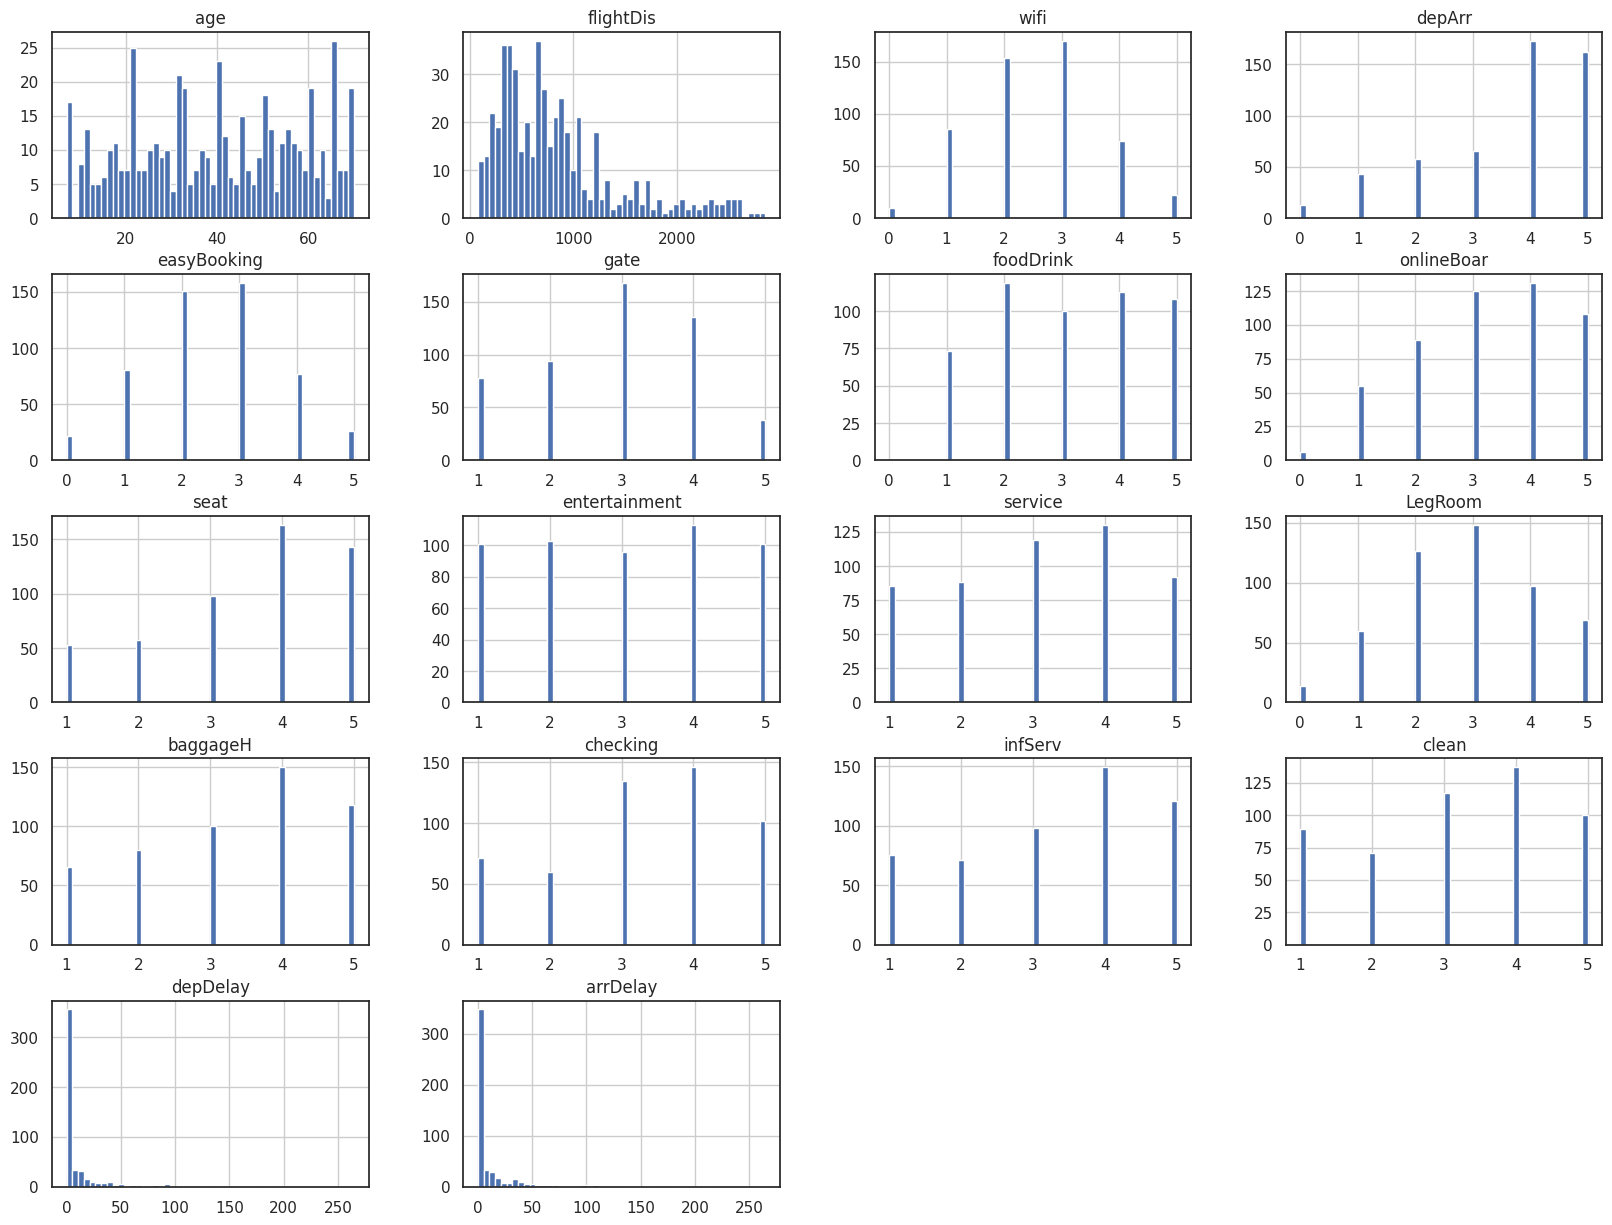

In [20]:
#визуализирую данные
warnings.filterwarnings('ignore')
dataCa.hist(bins=50, figsize=(20,15))
plt.show()

Также я решила обработать данные статистическими вопросами, чтобы попробовать получить какую-то дополнительную информацию из данных, которая не очевидна при простом взгляде на визуализацию данных. 

Рассматривая визуализацию данных меня заинтересовали вопросы касающиеся расстояния:

1)Зависит ли удовлетворенность полётом от расстояния, который пролетели пассажиры?

Нулевая гипотеза: удовлетворенность полётом не зависит от расстояния.

Для начала я рассмотрела распределение расстояния, далее был рассмотрен размер эффекта. При сравнении моего размера эффекта с разбросом данных, выяснилось, что размер эффекта небольшой, следовательно ассоциация между независимой и зависимой переменной имеет небольшую силу. 

2)А есть ли разница в расстоянии у довольных и недовольных пассажиров?

Нулевая гипотеза: разницы в расстоянии у довольных и недовольных пассажиров нет.

Так как с помощью теста Шапиро-Уилка выяснилось, что данные распределены не нормально, для ответа на этот вопрос был проведён непараметрический тест (Манна-Уитни) вместо стандартного t-теста. P-value оказался большим -- pvalue=0.9014101643714322 - больше 0.05, поэтому у меня не достаточно данных, чтобы отвергнуть нулевую гипотезу. И я НЕ могу сделать вывод, что эффект, скорее всего, существует и в популяции, и в выборке.

Следующее, что мне захотелось рассмотреть - это есть ли какая-нибудь взаимосвязь между полом пассажира и его удовлетворенность полётом.

Вопрос: Интересно, зависит ли удовлетворенность полётом от пола?

Нулевая гипотеза: удовлетворенность полётом у мужчин и женщин одинаковая. 

Так как этот статистический вопрос касается двух категориальных переменных - пол (м/ж) и удовлетворенность (да/нет) я использовала хи-квадрат. pvalue оказался больше 0.05, таким образом у меня также недостаточно оснований отвергнуть нулевую гипотезу. 

3)Также мне стало интересно, а что вообще влияет на удовлетворенность пассажиров, точнее какая из фич делает пассажиров довольными.

Для этого я построила логистическую регрессию. Выделяя переменные главной была переменная "satisfaction". Получившаяся мной модель оказалась статистически значима, так как LLR p-value == 3.596e-08, что <0,05.

Также оказалось, что для всех параметров, кроме "wifi", "onlineBoar" p-значение получилось больше определенного уровня (0.05), поэтому переменная-предиктора, кроме этих двух не имеет статистически значимую связь с переменной ответа в модели.

У получившейся модели Log-Likelihood: -125.54, а L-Null (нулевой модели): -161.76, поэтому она  лучше, чем нулевая, т.е. модель без предикторов, также она имела показатель качества модели псевдо-R^2=0.2239, значит показатель ближе к 0, а не к 1, поэтому у меня недостаточно данных для определения, что делает пассажиров удовлетворенными.

# Построение моделей для предсказания

Следующим этапом было построение моделей для предсказания, чтобы ответить на основной вопрос. Зависимой переменной является "satisfaction" (y), а остальные независимые (x). Выборку поделю в соотношении 1/3, так как у меня не так много данных - всего 514 наблюдений. 

В процессе ведения дневников были выполнены clustering + subgroup discovery, где задача состояла в том, чтобы разделить клиентов на группы, чтобы понять, какие услуги на борту больше влияют на удовлетворенность, чтобы улучшить какие-то "отстающие" услуги и сделать в будущем персонализированную рекламу, но мне они не подходят для ответа на мой основной вопрос, то есть бесполезны, поэтому я не включаю их в итоговый отчёт. 

Однако были получены следующие результаты, на которые можно обратить внимание: кластер, который был более удовлетворен -- по средним оценкам выставили более плохие оценки, нежели,  чем кластер наиболее удовлетворенный. С помощью subgroup discovery я заметила тот факт, что модель поделила данные на 3 подгруппы и из полученных данных выяснилось, что параметры повторяются (низкая оценка еды и напитков). Возможно авиакомпании следует пересмотреть предлагаемое меню, напитки.

Также были построены модели регрессии и регрессии с регуляризацией -- они представлены кратко при построении ансамблей.

### Дерево

Задача типа классификации - метрика "accuracy".

In [24]:
dataTr = dataCa.copy()

# переведем из object в int
dataTr['Gender'] = dataTr['Gender'].replace({
        'Female': 1,
        'Male' : 0})

                  
dataTr['satisfaction'] = dataTr['satisfaction'].replace({
        'neutral or dissatisfied': 0,
        'satisfied': 1})

In [25]:
y = dataTr.satisfaction 
X = dataTr.drop(["satisfaction"], axis=1)
X.head()

,Gender,age,flightDis,wifi,depArr,easyBooking,gate,foodDrink,onlineBoar,seat,entertainment,service,LegRoom,baggageH,checking,infServ,clean,depDelay,arrDelay
30,0,43,1235,1,5,1,1,1,1,4,3,3,1,5,4,3,5,0,0.0
70,1,53,1242,3,4,3,5,3,3,5,1,1,3,1,4,1,4,3,0.0
72,1,54,153,3,5,3,5,2,4,5,2,2,3,2,4,2,5,0,0.0
85,1,31,334,2,1,2,4,5,2,5,5,2,4,3,2,4,5,5,0.0
123,0,59,639,2,1,2,3,4,3,3,3,3,2,3,2,3,1,0,11.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)

In [27]:
treeTA = DecisionTreeClassifier(max_depth = 3)
treeTA.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
train_score = treeTA.score(X_train, y_train)
test_score = treeTA.score(X_test, y_test)
print('На тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_score, test_score) )

На тренировочном массиве модель работает с точностью 0.9619883040935673, а на тестовом массиве с точностью   0.98


На тестовом качество получилось даже лучше, чем на тренировочном

In [29]:
tree_pred = treeTA.predict(X_test)

In [30]:
print('Метрики:', metrics.accuracy_score(y_test, tree_pred), ';', metrics.f1_score(y_test, tree_pred, pos_label = 0 ))

Метрики: 0.9767441860465116 ; 0.9876543209876543


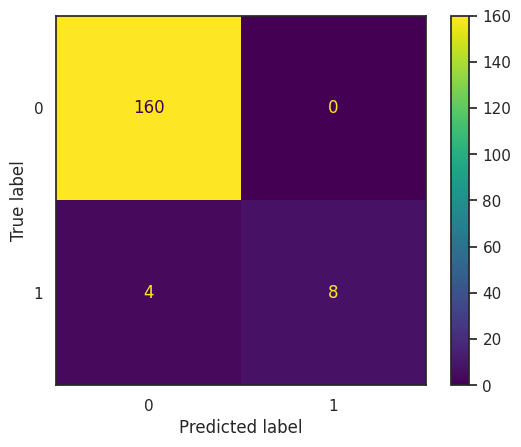

In [31]:
plot_confusion_matrix(treeTA, X_test, y_test, display_labels = [0, 1])

Модель ошибается 0 раз, когда он на самом деле недоволен. И ошибается 4 раза когда он на самом деле доволен, а модель думает, что он не доволен.

Строю дерево :

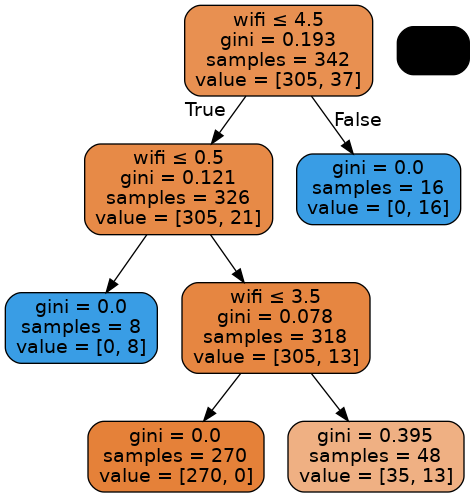

In [32]:
dot_data = StringIO()
export_graphviz(treeTA, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Для самого левого листа голубого цвета value = [0, 8], что значит, что в этот лист попало 0 представитель из числа недовольных и 8 из числа довольных -- предсказываем, что будет недоволен полётом. Или самый правый, нижний лист - [35, 13]. То есть 35 недовольных и 13 довольных - предсказываем, что будет недовольный. Качество дерева получилось хорошим, на тестовой выборе данных даже лучше, чем на тренировочной.

### Случайный лес

Поиск параметров для случайного леса:

In [33]:
def search_param(model, param, X_train, y_train, X_test, y_test, area=range(1, 11), msg=True, plot=True, seed=None):
    import matplotlib.pyplot as plt
    import time
    score_list = []
    if msg:
        print('#    точность    время')
    for abc in area:
        start = time.time()
        rfc = eval(model + '(' + param + '=' + str(abc) + ', random_state=' + str(seed) + ')')
        rfc.fit(X_train, y_train)
        s = rfc.score(X_test, y_test)
        end = time.time()
        score_list.append(s)
        if msg:
            print("%-3d %10f  %7f" % (abc, s, end - start))
    if plot:
        plt.plot(list(area), score_list)
    return list(area)[score_list.index(max(score_list))]

Поиск n_estimators -- количество деревьев в лесу

#    точность    время
1     0.953488  0.005402
2     0.976744  0.005548
3     0.970930  0.006425
4     0.976744  0.007372
5     0.976744  0.007598
6     0.976744  0.008517
7     0.970930  0.009483
8     0.965116  0.010752
9     0.965116  0.011420
10    0.970930  0.012202
11    0.965116  0.020504
12    0.965116  0.014531
13    0.965116  0.016592
14    0.965116  0.016003
15    0.965116  0.018195
16    0.970930  0.017829
17    0.965116  0.019794
18    0.965116  0.019701
19    0.965116  0.021725
20    0.965116  0.021829
21    0.965116  0.023325
22    0.970930  0.023446
23    0.965116  0.024151
24    0.970930  0.025058
25    0.965116  0.027035
26    0.965116  0.027635
27    0.965116  0.028017
28    0.965116  0.028862
29    0.965116  0.031705
30    0.965116  0.032643
31    0.959302  0.032108
32    0.965116  0.033717
33    0.959302  0.033805
34    0.959302  0.034383
35    0.959302  0.037181
36    0.965116  0.038233
37    0.965116  0.038409
38    0.970930  0.038244
39    0.965116  0.039460
40

2

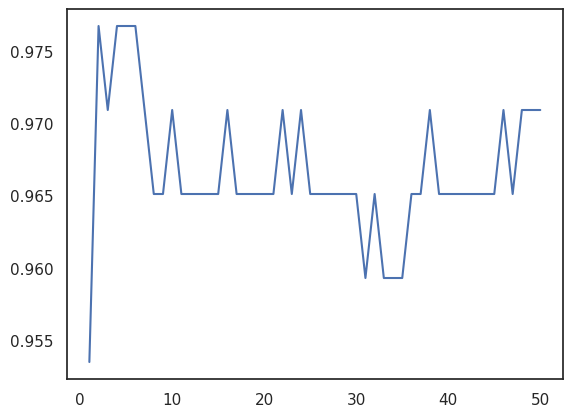

In [34]:
# поиск n_estimators -- количество деревьев в лесу

search_param('RandomForestClassifier', 'n_estimators', X_train, y_train, X_test, y_test, area=range(1, 51), seed= 15 )

Поиск max_depth -- максимальной глубины

#    точность    время
1     0.930233  0.086415
2     0.965116  0.087996
3     0.970930  0.090556
4     0.970930  0.093309
5     0.970930  0.100939
6     0.976744  0.095766
7     0.976744  0.096643
8     0.976744  0.099909
9     0.970930  0.098998
10    0.970930  0.097406
11    0.970930  0.097619
12    0.970930  0.102509
13    0.970930  0.097434
14    0.970930  0.095562
15    0.970930  0.101380
16    0.970930  0.097600
17    0.970930  0.096726
18    0.970930  0.101240
19    0.970930  0.097192
20    0.970930  0.097505
21    0.970930  0.096467
22    0.970930  0.095826
23    0.970930  0.097976
24    0.970930  0.100253


6

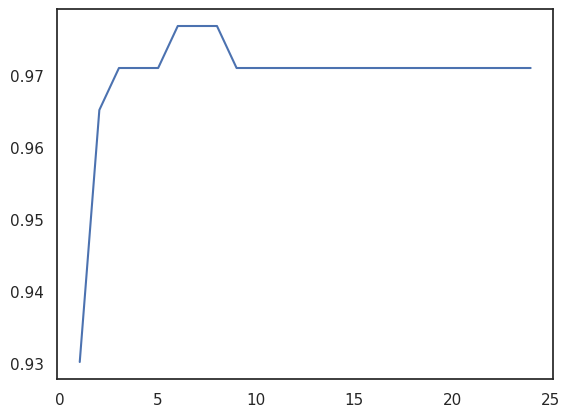

In [35]:
# поиск max_depth -- максимальной глубины
search_param('RandomForestClassifier', 'max_depth', X_train, y_train, X_test, y_test, range(1, 25), seed=15)

Поиск min_samples_split -- минимальное кол-во выборок, необходимых для разделения 

#    точность    время
2     0.970930  0.108110
3     0.970930  0.098649
4     0.970930  0.096042
5     0.976744  0.098762
6     0.970930  0.095242
7     0.976744  0.100182
8     0.976744  0.095209
9     0.976744  0.095057


5

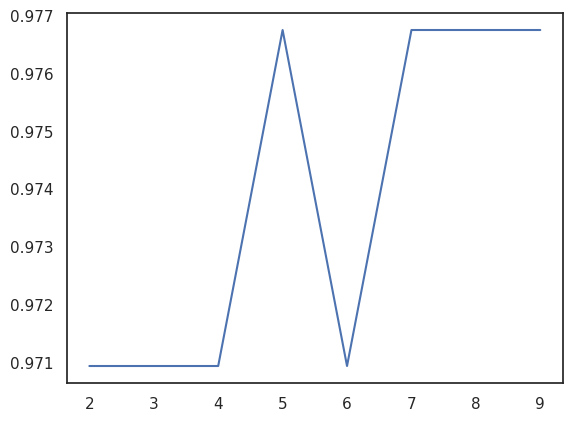

In [36]:
# поиск min_samples_split -- минимальное кол-во выборок, необходимых для разделения 
search_param('RandomForestClassifier', 'min_samples_split', X_train, y_train, X_test, y_test, range(2, 10), seed=15)

Поиск min_samples_leaf -- минимальное кол-во примеров, требуемое для нахождения в листовом узле

#    точность    время
1     0.970930  0.106680
2     0.970930  0.097728
3     0.970930  0.098997
4     0.970930  0.099919
5     0.965116  0.096410
6     0.965116  0.096460
7     0.965116  0.092412
8     0.965116  0.093556
9     0.965116  0.096223


1

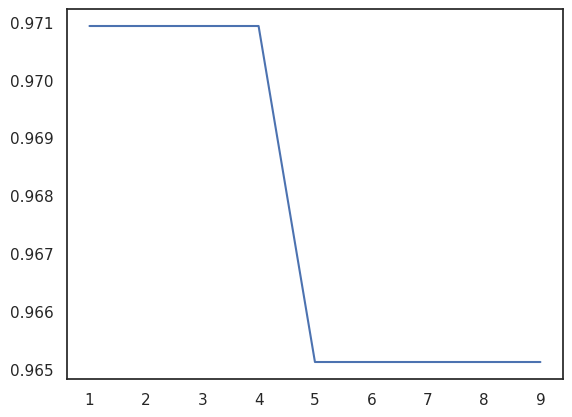

In [37]:
# поиск min_samples_leaf -- минимальное кол-во примеров, требуемое для нахождения в листовом узле
search_param('RandomForestClassifier', 'min_samples_leaf', X_train, y_train, X_test, y_test, range(1, 10), seed=15)

Кросс-валидация. Я решила использовать перекрестную проверку, чтобы выявить наилучшие параметры. 

In [38]:
randFCl = RandomForestClassifier(random_state=15)
param = {'n_estimators': [i for i in range(38, 51)], 'max_depth': [i for i in range(20, 25)]}
gscv =  GridSearchCV(randFCl, param, cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 65 candidates, totalling 195 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'max_depth': [20, 21, 22, 23, 24],
                         'n_estimators': [38, 39, 40, 41, 42, 43, 44, 45, 46,
                                          47, 48, 49, 50]},
             verbose=1)

In [39]:
gscv.best_params_

{'max_depth': 20, 'n_estimators': 38}

Создаю модель по полученным данным:

<AxesSubplot: >

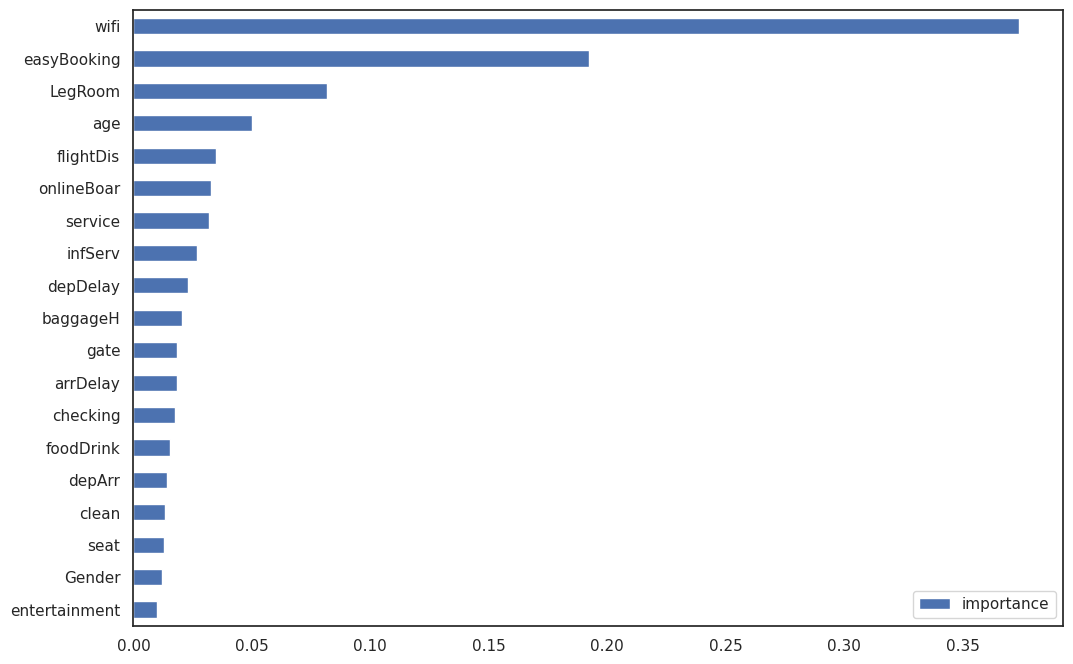

In [40]:
best_c = gscv.best_estimator_
imp = pd.DataFrame(best_c.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [41]:
print('На тренировочном массиве с точностью', best_c.score(X_train, y_train), 'На тестовом массиве с точностью', best_c.score(X_test, y_test))

На тренировочном массиве с точностью 1.0 На тестовом массиве с точностью 0.9709302325581395


Разница не сильно большая, но кажется есть небольшое переобучение.

In [42]:
dtc_proba=best_c.predict_proba(X_test)
dtc_proba=dtc_proba[:,1]
auc=roc_auc_score(y_test, dtc_proba)
print('Случайный лес: ROC AUC=%.3f' % (auc))

Случайный лес: ROC AUC=0.953


### Ансамбли

Основа для ансамблей:

In [43]:
# лог. регрессия
logReg = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
logReg.fit(X_train, y_train)
train_score_log = logReg.score(X_train, y_train)
test_score_log = logReg.score(X_test, y_test)
print('Регрессия : на тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_score_log, test_score_log) )

# с регуляризацией
logReg2 = LogisticRegression(C=0.0002, solver='lbfgs', multi_class='multinomial',random_state=1)
logReg2.fit(X_train, y_train)
train_score_logred = logReg2.score(X_train, y_train)
test_score_logreg = logReg2.score(X_test, y_test)
print('Регрессия с регуляризацией: на тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_score_logred, test_score_logreg) )

# дерево
print('Дерево: на тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_score, test_score) )

# лес
train_rf_score = best_c.score(X_train, y_train)
test_rf_score = best_c.score(X_test, y_test)
print('Лес: на тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_rf_score, test_rf_score) )

Регрессия : на тренировочном массиве модель работает с точностью 0.9064327485380117, а на тестовом массиве с точностью   0.94
Регрессия с регуляризацией: на тренировочном массиве модель работает с точностью 0.8918128654970761, а на тестовом массиве с точностью   0.93
Дерево: на тренировочном массиве модель работает с точностью 0.9619883040935673, а на тестовом массиве с точностью   0.98
Лес: на тренировочном массиве модель работает с точностью 1.0, а на тестовом массиве с точностью   0.97


Строю ансамбли:

In [46]:
# голосование
modelVote = VotingClassifier(estimators=[('lr', logReg), ('dt', treeTA), ('lrreg', logReg2), ('rf', best_c)], voting='hard')
modelVote.fit(X_train,y_train)
train_mv = modelVote.score(X_train,y_train)
test_mv = modelVote.score(X_test,y_test)
print('Голосование на тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_mv, test_mv) )

# бэггинг
modelBag = BaggingClassifier(base_estimator=logReg, n_estimators=100, random_state=5)
modelBag.fit(X_train, y_train)
train_mb = modelBag.score(X_train, y_train)
test_mb = modelBag.score(X_test, y_test)
print('Бэггинг на тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_mb, test_mb) )

# бустинг - идентифицирую слабые модели
modelAB = AdaBoostClassifier(base_estimator=logReg, n_estimators=100) #на основании высоких значений
modelAB.fit(X_train, y_train)
train_AB = modelAB.score(X_train, y_train)
test_AB = modelAB.score(X_test, y_test)
print('Бустинг (выс.знач.) на тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_AB, test_AB) )

modelGB = GradientBoostingClassifier(n_estimators=100) #на основании градиентов функции потерь
modelGB.fit(X_train, y_train)
train_GB = modelGB.score(X_train, y_train)
test_GB = modelGB.score(X_test, y_test)
print('Бустинг (град.) на тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_GB, test_GB) )

Голосование на тренировочном массиве модель работает с точностью 0.9093567251461988, а на тестовом массиве с точностью   0.94
Бэггинг на тренировочном массиве модель работает с точностью 0.9064327485380117, а на тестовом массиве с точностью   0.94
Бустинг (выс.знач.) на тренировочном массиве модель работает с точностью 0.8976608187134503, а на тестовом массиве с точностью   0.92
Бустинг (град.) на тренировочном массиве модель работает с точностью 1.0, а на тестовом массиве с точностью   0.96


### Выбираю модель:

In [47]:
for clf, label in zip([treeTA, logReg,logReg, best_c, modelVote, modelBag, modelAB, modelGB], ['Дерево', 'Регрессия', 'Регрессия с регуляризацией', 'Лес', 'Ансамбль голосование', 'Ансамбль bagging', 'Ансамбль ada boosting', 'Ансамбль gradient boosting']): 
    scores = cross_val_score(clf, X_test, y_test, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Дерево]
Accuracy: 0.89 (+/- 0.03) [Регрессия]
Accuracy: 0.89 (+/- 0.03) [Регрессия с регуляризацией]
Accuracy: 0.96 (+/- 0.01) [Лес]
Accuracy: 0.94 (+/- 0.01) [Ансамбль голосование]
Accuracy: 0.90 (+/- 0.04) [Ансамбль bagging]
Accuracy: 0.90 (+/- 0.03) [Ансамбль ada boosting]
Accuracy: 0.95 (+/- 0.02) [Ансамбль gradient boosting]


In [48]:
print('Случайный лес: ROC AUC=%.3f' % (auc))

Случайный лес: ROC AUC=0.953


В целом из всех наилучшие показатели у Леса и Ансамбля gradient boosting. Лес: при сравнении с  Accuracy тестового и тренировочного были признаки переобучения, также у леса ROC 0.95 - хороший показатель, modelGB также имела признаки переобучения, однако у леса признаки менее выражены (1.0 -> 0.97 vs. 1-> 0.959) поэтому выбираю лес.

# Исследование модели

### Как влияют конкретные переменные:

Так как случайный лес -- использую feature_importances_

In [49]:
best_c.feature_importances_

array([0.0119005 , 0.04984615, 0.03497608, 0.37390031, 0.01406214,
       0.19226943, 0.01853818, 0.01542472, 0.03270384, 0.01307883,
       0.00999772, 0.03200418, 0.08188333, 0.02040017, 0.01749347,
       0.02685889, 0.01326785, 0.02293789, 0.01845632])

In [50]:
names = ['Gender', 'age', 'flightDis', 'wifi', 'depArr', 'easyBooking', 'gate', 'foodDrink', 'onlineBoar', 'seat', 'entertainment', 'service', 'LegRoom', 'baggageH', 'checking', 'infServ', 'clean', 'depDelay', 'arrDelay']
names[0:19]

['Gender',
 'age',
 'flightDis',
 'wifi',
 'depArr',
 'easyBooking',
 'gate',
 'foodDrink',
 'onlineBoar',
 'seat',
 'entertainment',
 'service',
 'LegRoom',
 'baggageH',
 'checking',
 'infServ',
 'clean',
 'depDelay',
 'arrDelay']

In [51]:
rf = eli5.explain_weights_df(best_c, feature_names=names[0:19])
rf

,feature,weight,std
0,wifi,0.373900,0.223792
1,easyBooking,0.192269,0.159839
2,LegRoom,0.081883,0.073164
3,age,0.049846,0.048226
4,flightDis,0.034976,0.047135
5,onlineBoar,0.032704,0.037453
6,service,0.032004,0.034738
7,infServ,0.026859,0.039075
8,depDelay,0.022938,0.027891
9,baggageH,0.020400,0.019614


In [52]:
# Permutation Importance 
permRF = PermutationImportance(best_c).fit(X_test, y_test)
eli5.explain_weights_df(permRF, feature_names=names[0:19])

,feature,weight,std
0,wifi,5.697674e-02,0.010003
1,Gender,4.651163e-03,0.004351
2,checking,4.651163e-03,0.004351
3,entertainment,3.488372e-03,0.002848
4,depDelay,3.488372e-03,0.002848
5,infServ,2.325581e-03,0.002848
6,LegRoom,1.162791e-03,0.002326
7,gate,1.162791e-03,0.002326
8,foodDrink,0.000000e+00,0.000000
9,depArr,0.000000e+00,0.000000


In [53]:
eli5.show_weights(permRF, feature_names=names[0:19])

Weight,Feature
0.0570 ± 0.0200,wifi
0.0047 ± 0.0087,Gender
0.0047 ± 0.0087,checking
0.0035 ± 0.0057,entertainment
0.0035 ± 0.0057,depDelay
0.0023 ± 0.0057,infServ
0.0012 ± 0.0047,LegRoom
0.0012 ± 0.0047,gate
0 ± 0.0000,foodDrink
0 ± 0.0000,depArr


Выбираю переменную wifi, LegRoom так как для данной модели они наиболее важные, чаще всего встречаются, разделение более значимо и больше разделений по feature_importances_. Также по feature_importances_ важной переменной был возраст(age), но по Permutation Importance он не показал значимости. ( + также infServ показал значимость в обеих) И мне захотелось рассмотреть переменную easyBooking.

"wifi" :

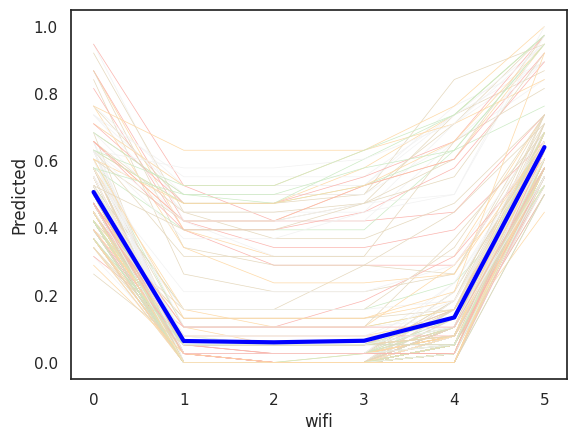

In [54]:
cmap2 = plt.get_cmap('Pastel1')

def predict_new(X):
    return best_c.predict_proba(X)[:,1]
wifiRF = ice(data=X_train, column='wifi', 
                   predict=predict_new)

ice_plot(wifiRF, linewidth=0.5, color_by='infServ', cmap=cmap2, plot_pdp=True,
        pdp_kwargs={'c': 'blue', 'linewidth': 3})
plt.ylabel('Predicted')
plt.xlabel('wifi');

Согласно модели, предсказание резко увеличивается при оценке wifi меньше "1" или больше "4". Также заметно небольшое увеличение качества предсказания больше "3". 

"easyBooking" :

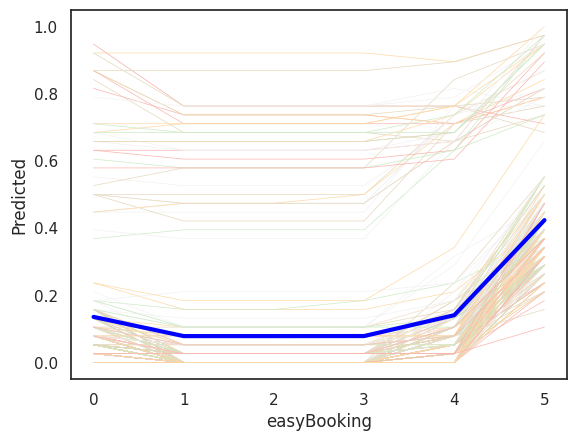

In [55]:
def predict_new(X):
    return best_c.predict_proba(X)[:,1]
ebRF = ice(data=X_train, column='easyBooking', 
                   predict=predict_new)

ice_plot(ebRF, linewidth=0.5, color_by='infServ', cmap=cmap2, plot_pdp=True,
        pdp_kwargs={'c': 'blue', 'linewidth': 3})
plt.ylabel('Predicted')
plt.xlabel('easyBooking');

Согласно графику предсказание модели увеличивается ясно при оценке больше 4, то есть при "5". Небольшое увеличение заметно при оценка "4".

"LegRoom" :

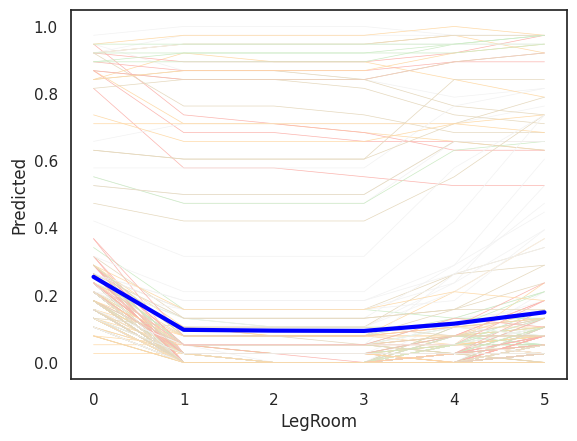

In [56]:
def predict_new(X):
    return best_c.predict_proba(X)[:,1]
lrRF = ice(data=X_train, column='LegRoom', 
                   predict=predict_new)

ice_plot(lrRF, linewidth=0.5, color_by='infServ', cmap=cmap2, plot_pdp=True,
        pdp_kwargs={'c': 'blue', 'linewidth': 3})
plt.ylabel('Predicted')
plt.xlabel('LegRoom');

Согласно графику у модели явное улучшение предсказания при оценке меньше "1" ( то есть "0"), далее улучшения предсказания практически не наблюдается.

### Что влияет на результат конкретного примера:

In [57]:
explainer = shap.Explainer(best_c)
shap_values = explainer.shap_values(X_test)

График важности признаков для каждого класса:

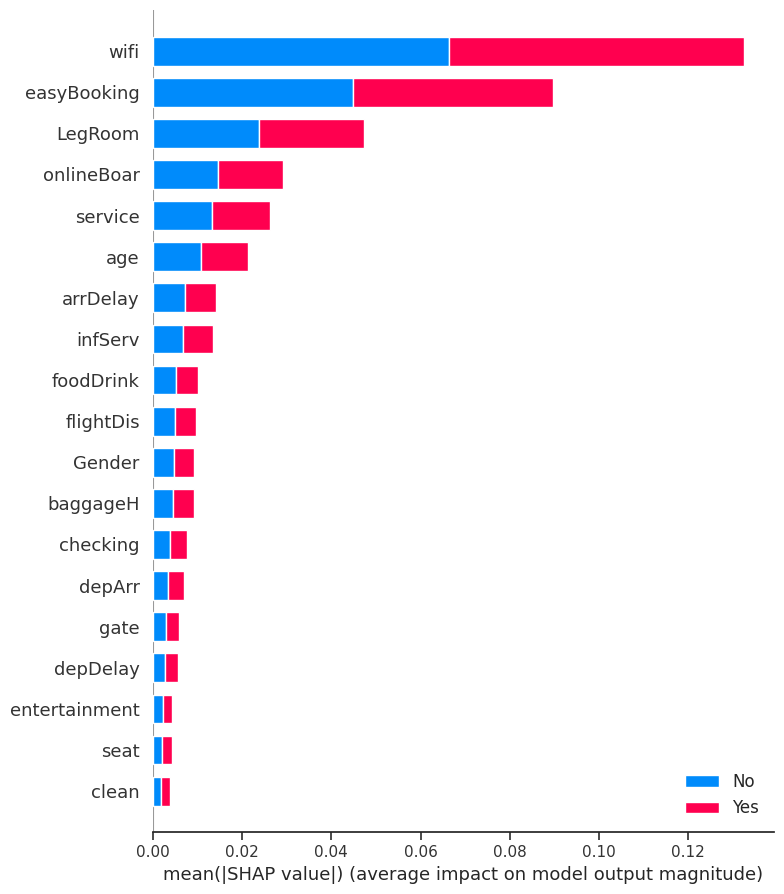

In [58]:
shap.summary_plot(shap_values, X_test,
                  feature_names = dataTr.columns,
                  class_names=["No", "Yes"])

Наиболее значимым признаком - параметром оказался вайфай, легкость бронировани. Оценка вайфая имеет среднее влияние на величину выходных данных модели более 0.12.

График зависимости как изменяется wifi при изменении infServ:

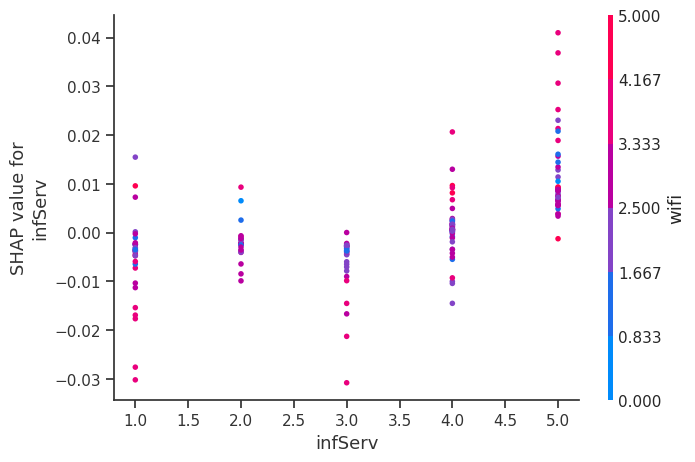

In [59]:
# довольные
shap.dependence_plot("infServ", shap_values[1], X_test, 
                    feature_names=dataTr.columns,
                    interaction_index="wifi")

График показывает влияние, которое переменные оказывают на прогнозируемый результат. По графику видно, что связь между целью среди довольных и переменными не является линейной, а скорее она более сложная. При оценках после 3 (включительно), то есть 3, 4, 5 - связь похожа на линейную и положительную, а от 1 до 3 она более монотонна с возможными выбросами(?). 

График зависимости как изменяется wifi при изменении age:

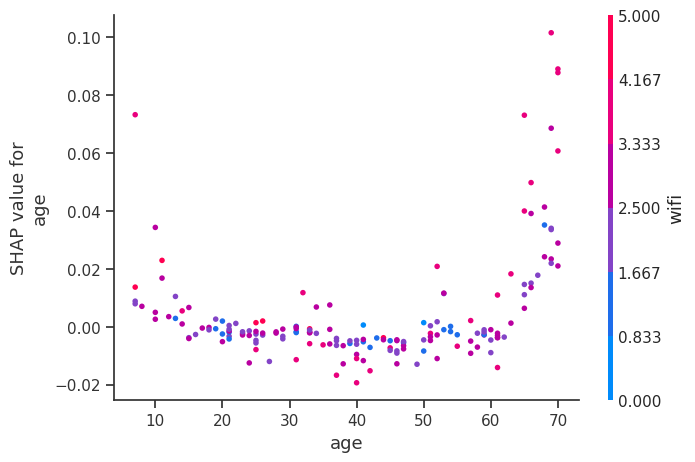

In [60]:
# довольные
shap.dependence_plot("age", shap_values[1], X_test, 
                    feature_names=dataTr.columns,
                    interaction_index="wifi")

На графике можно заметить, что в данной модели связь между целью среди довольных и переменными не является линейной, а скорее она более сложная. После 67 лет наблюдается положительная тенденция, а с 20 до 60 лет связь сложная и более монотонная. 

Другие графики зависимости:

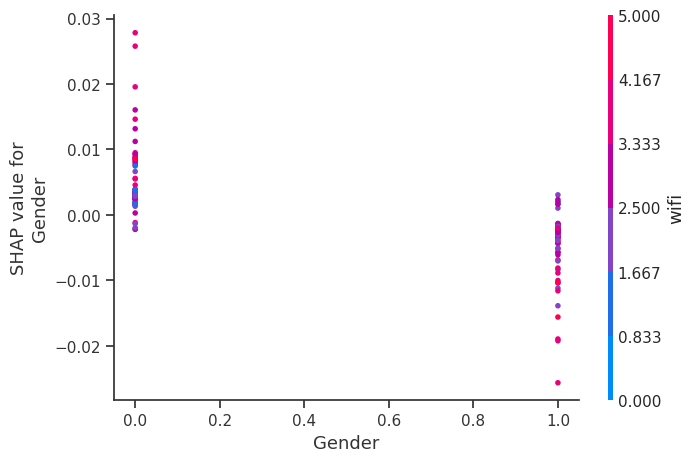

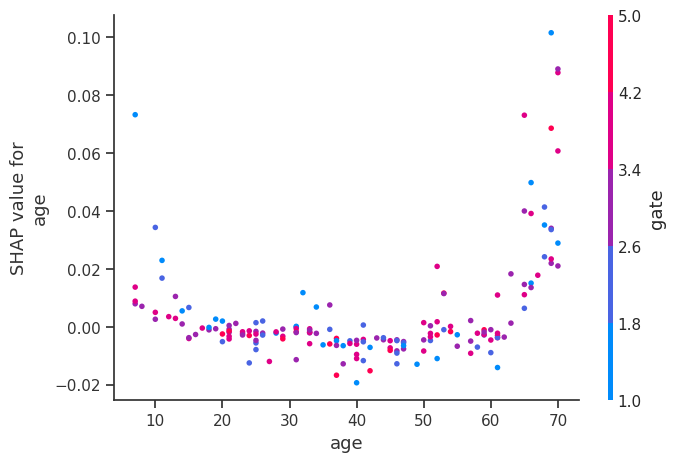

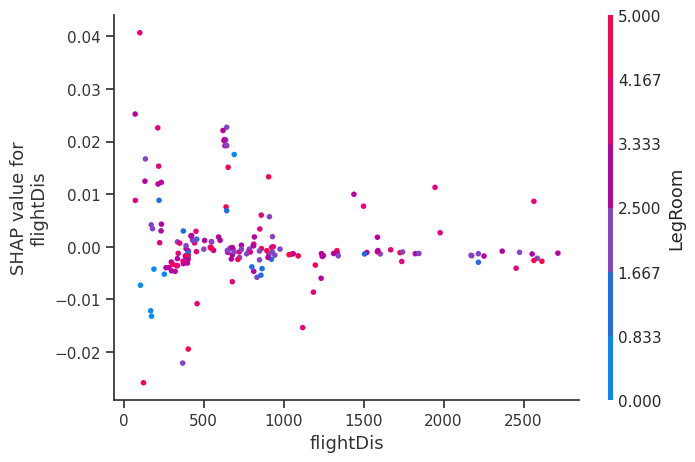

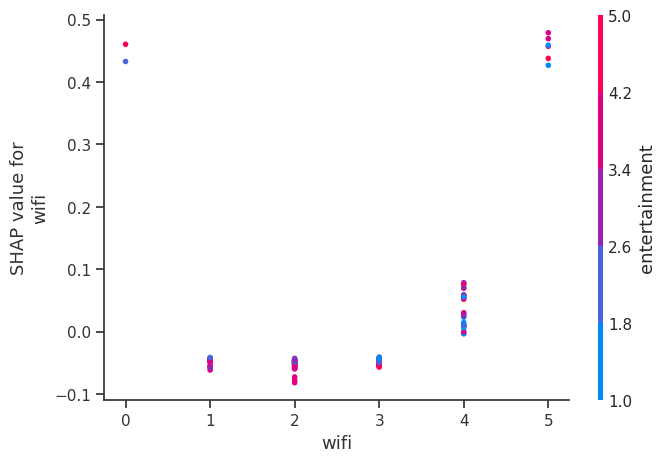

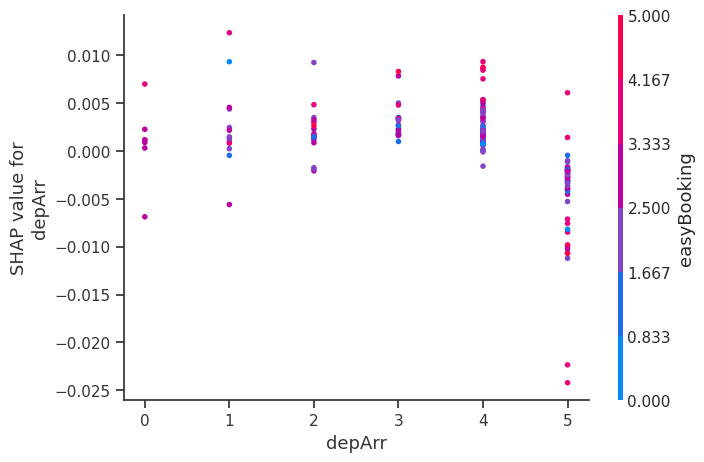

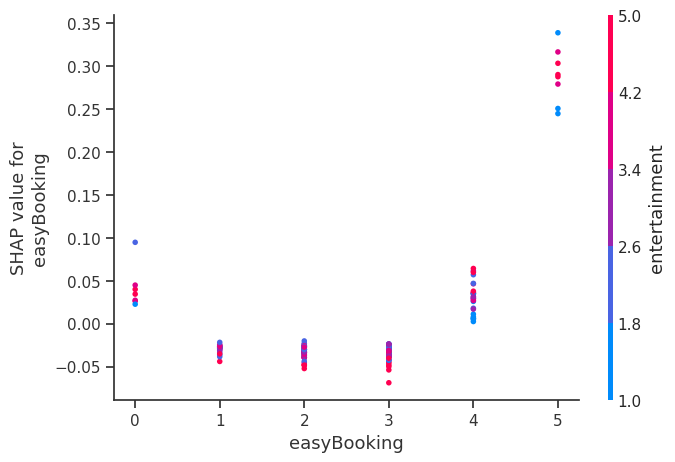

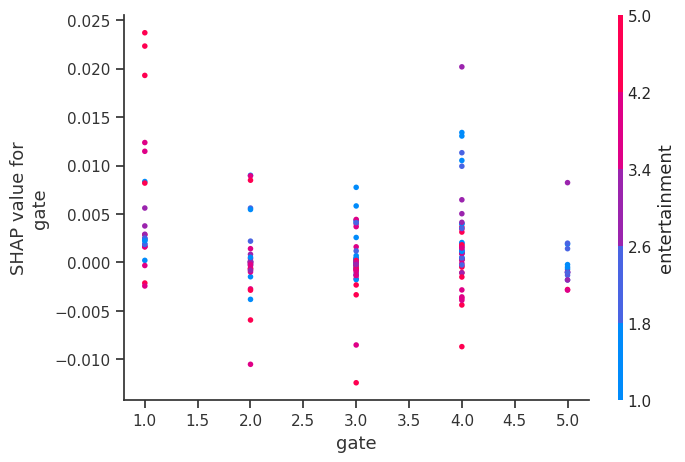

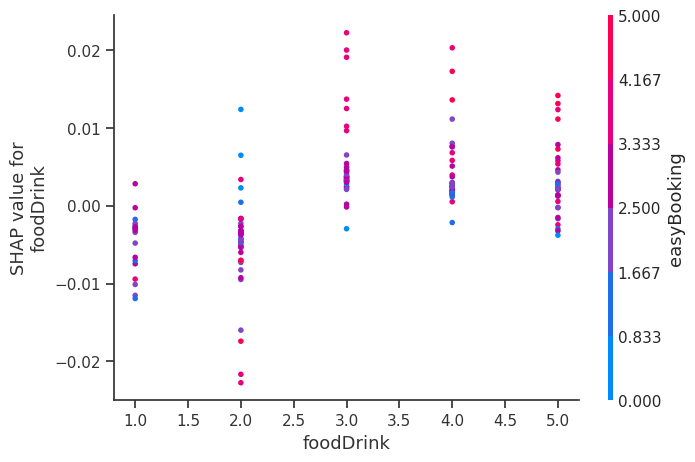

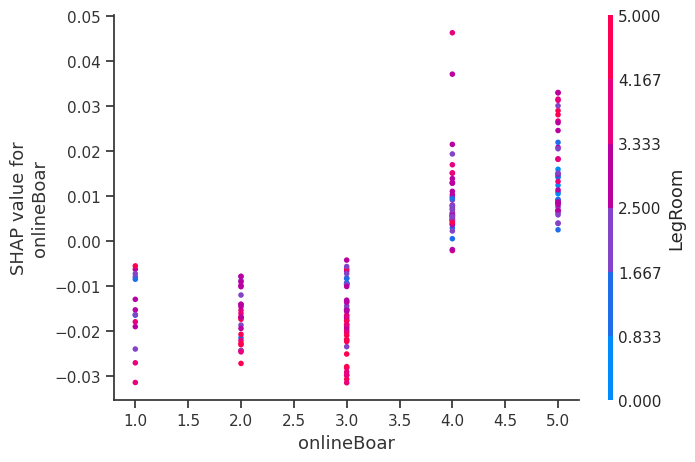

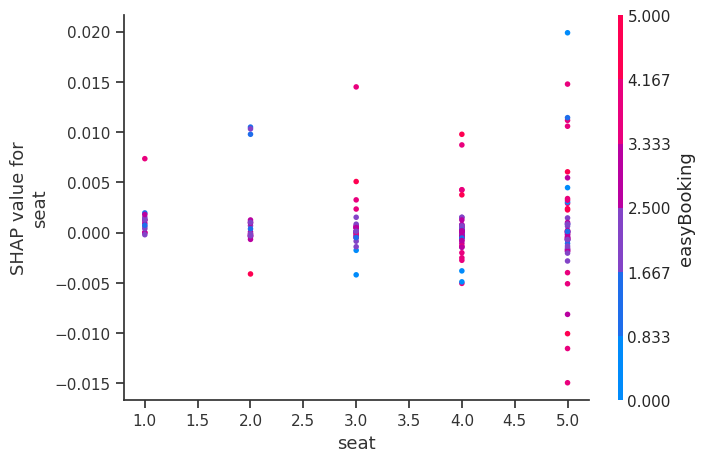

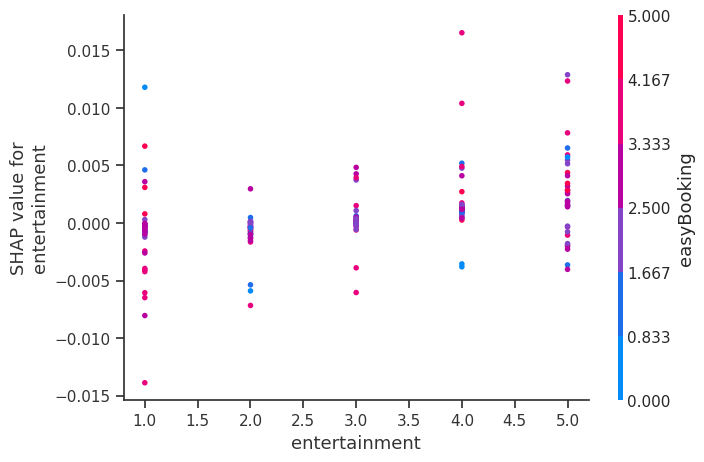

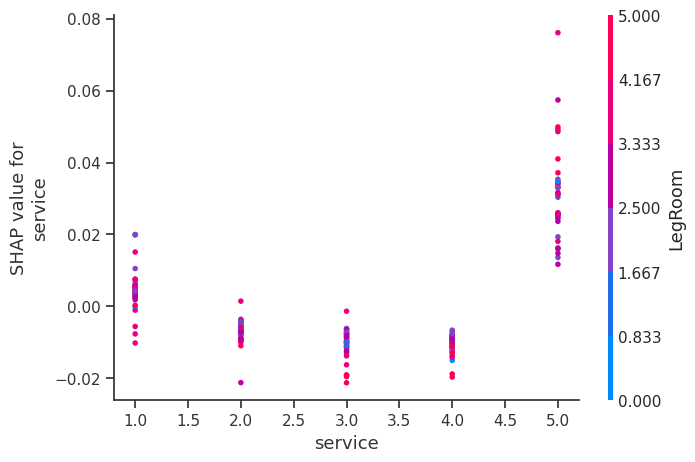

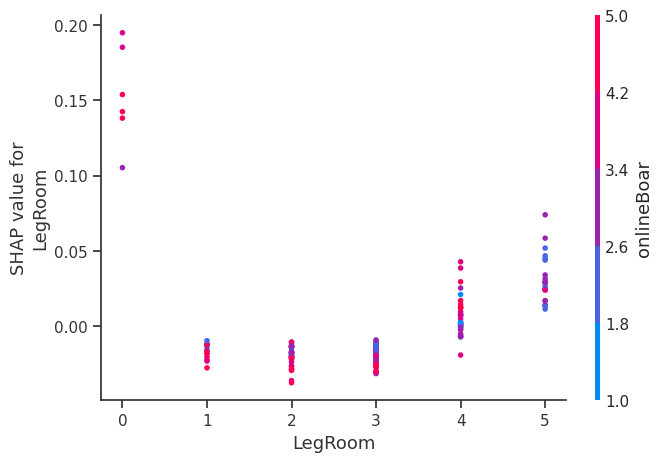

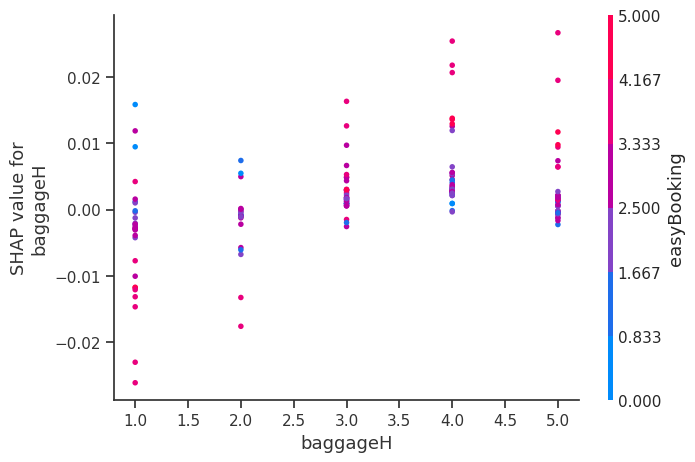

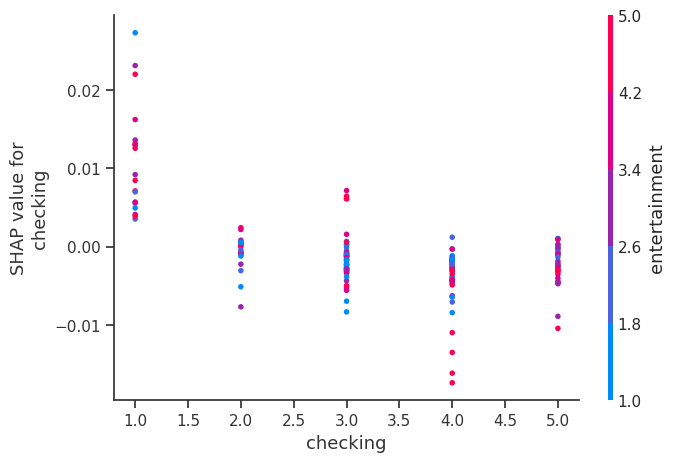

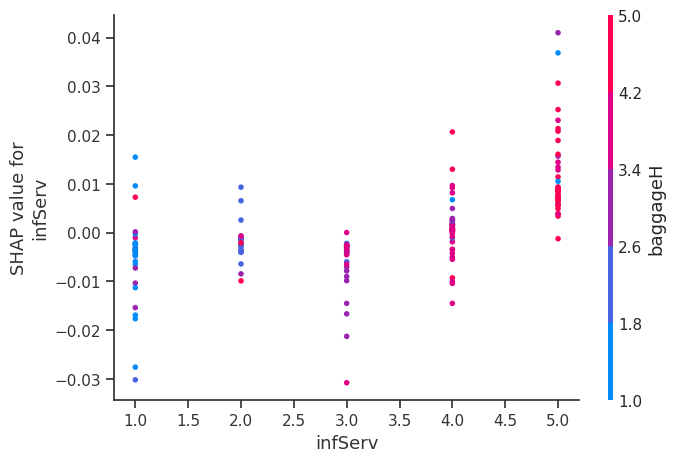

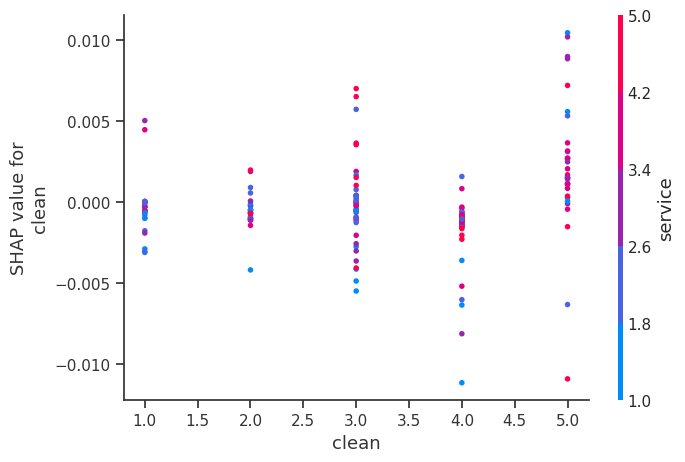

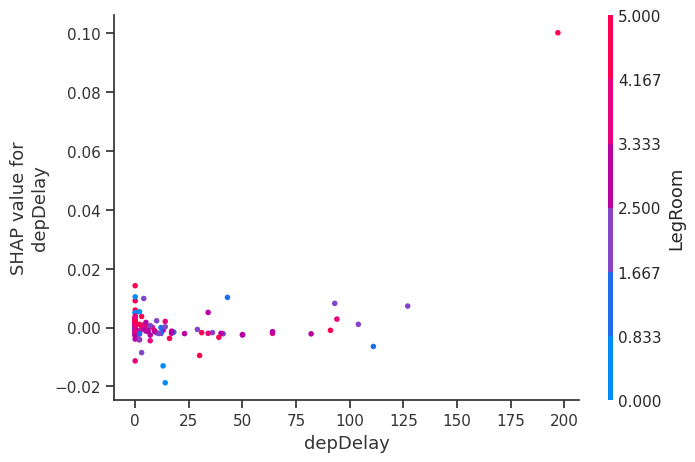

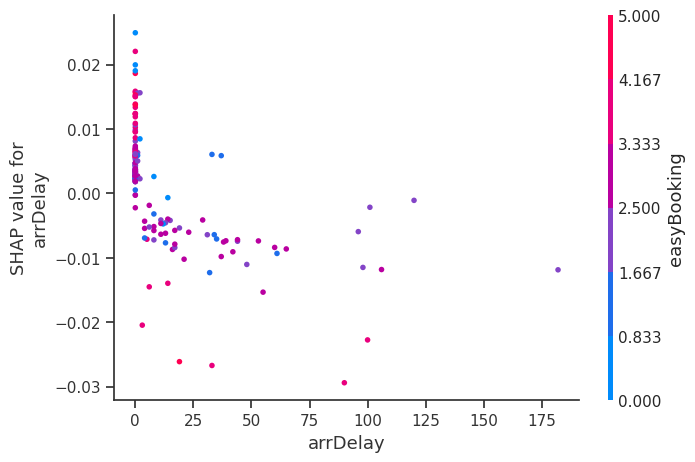

In [61]:
for feature_name in X_test.columns:
    shap.dependence_plot(feature_name, shap_values[1], X_test, display_features=X_test)

Анализируя графики можно сделать вывод, что при взаимосвязи foodDrink и easyBooking наиболее высокое значение shap-value наблюдается прим foodDrink = "3", при foodDrink = "3","4" или "5" очевидно увеличение shap-value с увеличением значения easyBooking, что в свою очередь, означает, что удаление этого признака означает меньшую  важность признака. Обратную картину можно наблюдать при анализе графика LegRoom и onlineBoar - небольшое значение shap-value(отрицательное)  для onlineBoar при её наименьших оценках - "1","2" или "3". Также практически на всех графиках наблюдаются выбросы. Делать выводы о важности тех или иных признаков в модели сложно, так как shap-values зависят не только от модели, но и от распределения данных, при этом даже признаки, которые никак не используются моделью, могут иметь ненулевые shap-values. 

Для случая "0" :

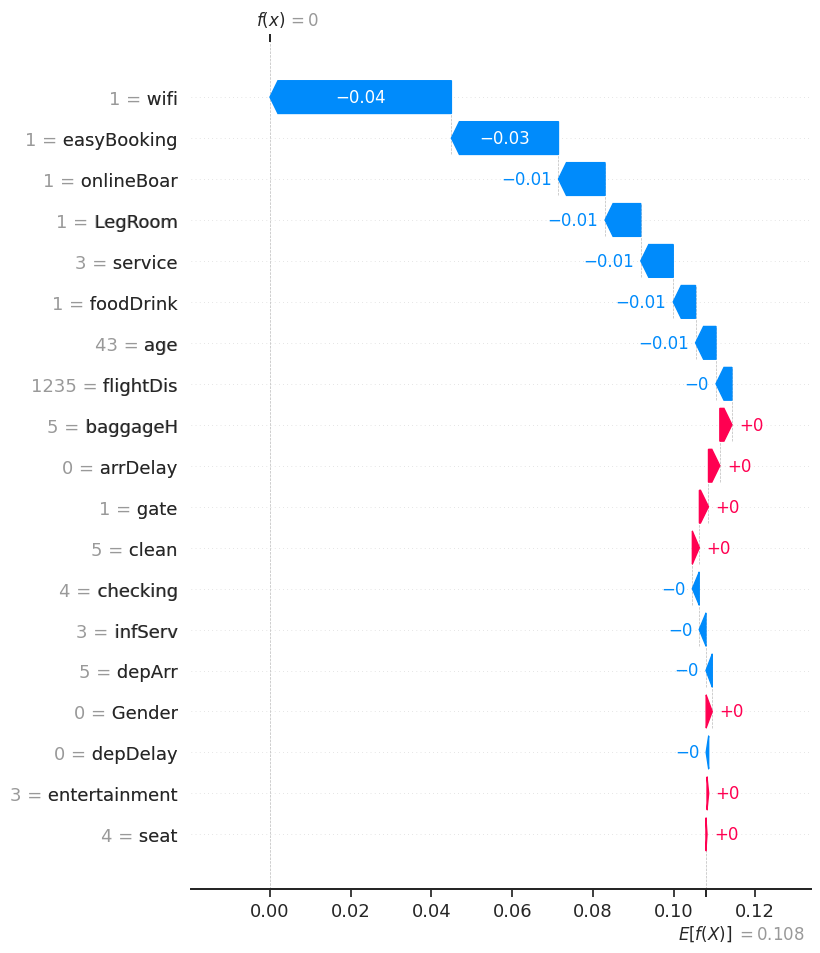

In [62]:
explainer1 = TreeExplainer(best_c)
sv = explainer1(X)
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=dataTr.values, 
                  feature_names=dataTr.columns)
idx = 0
waterfall(exp[idx], max_display=20)

Можно заметить, что вайфай = "1" снижает вероятность. Такой же тренд можно заметить при оценке easyBooking или onlineBoar или LegRoom  "0". Увеличение можно заметить на 7 параметрах. Но не большое, меньше 0.01. Среднее прогнозируемое значение 0.108, а минимальное = 0.

SHAP-значения для предсказания 1 (довольный) для примера i

In [63]:
shap_values[1][idx]

array([ 0.00316114, -0.00209788, -0.00032445, -0.0509032 ,  0.00439595,
       -0.03909851,  0.00399989,  0.00352645, -0.02781189,  0.00016736,
       -0.00012984, -0.0188186 ,  0.03143243,  0.00185624, -0.00282041,
        0.00337652, -0.00049698,  0.00184759,  0.00709768])

Для случая "15" :

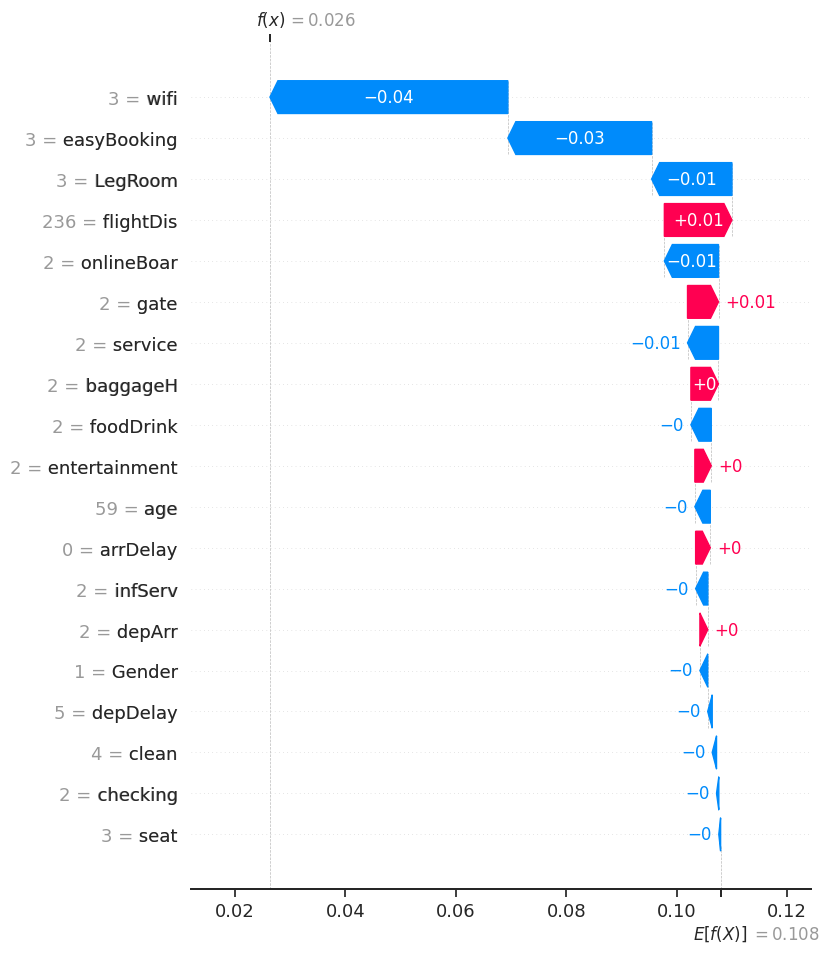

In [64]:
idx = 15
waterfall(exp[idx], max_display=20)

При значении оценка вайфая в "3" снижает прогнозируемую вероятность того, что этот человек будет доволен. Такой же тренд можно заметить если бы оценка easyBooking или LegRoom также была равна "3". Более явное улучшение предсказания можно заметить при расстоянии полёта в 236 км. Среднее прогнозируемое значение 0.108, минимальное 0.026

In [65]:
shap_values[1][idx]

array([ 0.0039348 , -0.00457259,  0.01933781, -0.05868153,  0.00181405,
       -0.03226324,  0.0017045 ,  0.00761152,  0.01094675, -0.00134387,
        0.00153213, -0.00909909, -0.02117031, -0.00038848, -0.00424552,
        0.00140526, -0.00092562, -0.00082966,  0.00359257])

Для случая "120" :

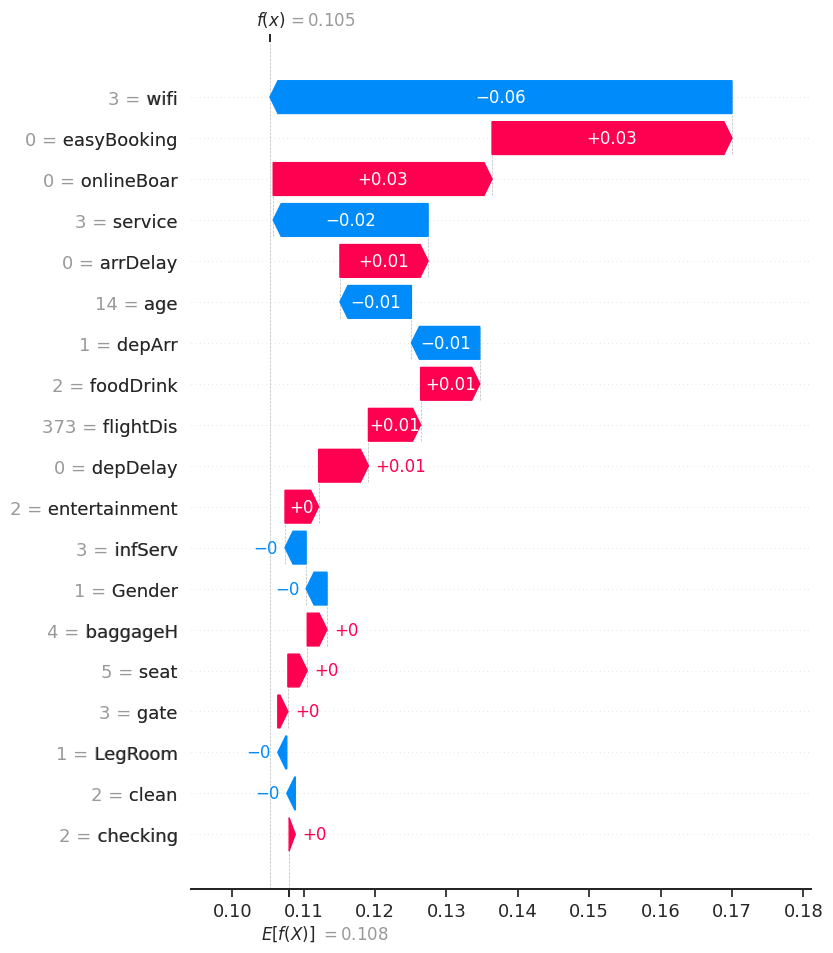

In [66]:
idx = 120
waterfall(exp[idx], max_display=20)

Тут уже интереснее. Среднее прогнозируемое значение также 0.108(как и будет везде), минимальное 0.105. При значении оценка вайфая в "3" снижает прогнозируемую вероятность того, что этот человек будет доволен на -0.06. В отличие от прошлого примера для №15 при easyBooking в "3" предсказание увеличивается +0.03, такое же увеличение предсказания можно заметить при оценке onlineBoar "0". В целом 8 значений уменьшают предсказание, а 11 увеличивают.

In [67]:
explainer1.expected_value[1]

0.10795629424438287

In [68]:
best_c.predict_proba(X_train)[:,1].mean()

0.10995690981840565

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb67e232-f852-42ce-9fc4-3e959f184dc1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>